#A SAMPLE PROGRAM: ANOMALY DETECTION IN IoT NETWORKS
##Cadidate: Doan Nguyen



In this sample program, I will demonstrate an anomaly detection task using an autoencoder-based neural network to identify cyberattacks on IoT devices by analysing network traffic data. This approach aligns with key research areas such as AI-driven cybersecurity, network management, and data analytics for cybersecurity, which are emphasized in the AI and Cyber Security program at Victoria University.

###Technologies and Tools
This program integrates AI techniques and cybersecurity methodologies, contributing to the program’s research and teaching in AI-driven security operations, vulnerability analysis, and enterprise security management. The following tools and frameworks are utilized:

•	Python – The programming language used to implement the analysis.

•	TensorFlow – A deep learning framework for building and training the autoencoder model.

•	Autoencoder Neural Network – A model that learns to compress and reconstruct network traffic data to detect anomalies.

•	MSLE (Mean Squared Logarithmic Error) – The loss function for measuring reconstruction errors.

•	Scikit-learn – Used for data preprocessing and evaluation.

###Dataset and Context
I will utilize the N-BaIoT dataset, a benchmark dataset for evaluating Anomaly Detection Systems in IoT environments. This dataset, derived from research by Meidan et al. (2018), consists of network traffic data from various IoT devices under both benign conditions and two major cyberattacks: Mirai and Bashlite. This provides a practical foundation for exploring AI applications in cybersecurity, a key focus of the IT Program at Victoria University.

Reference: Y. Meidan et al., “N-BaIoT—Network-Based Detection of IoT Botnet Attacks Using Deep Autoencoders,” IEEE Pervasive Computing, vol. 17, no. 3, pp. 12–22, 2018.

# WORKFLOW
1. Load data
2. Preprocessing
3. Create an autoencoder model
4. Train the model
5. Find a threshold
6. Detect Anomalies
7. Save the model



# 1. Load data

### Import Libraries

In [ ]:
# Import Libraries
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from tensorflow.keras import Sequential
from keras.layers import Dense


### Download N_BaIoT dataset

To simplify access to the N-BaIoT dataset, I have stored it in my Google Drive and shared it via the following link:

https://drive.google.com/drive/folders/1zoMUFUUM8MxzkuFw2hvc_KZvF__dRECi?usp=sharing

In this program, I will use gdown to download all data from the shared Google Drive folder.

In [ ]:
%%capture
!pip install --upgrade --quiet gdown
!gdown --folder --continue 1zoMUFUUM8MxzkuFw2hvc_KZvF__dRECi -O /content/

### Select an IoT device to continue.

The N-BaIoT dataset provides a comprehensive collection of network traffic data from 9 IoT devices, capturing both normal operations (benign data) and two types of cyber-attacks: Mirai and Bashlite, as detailed in the table below.

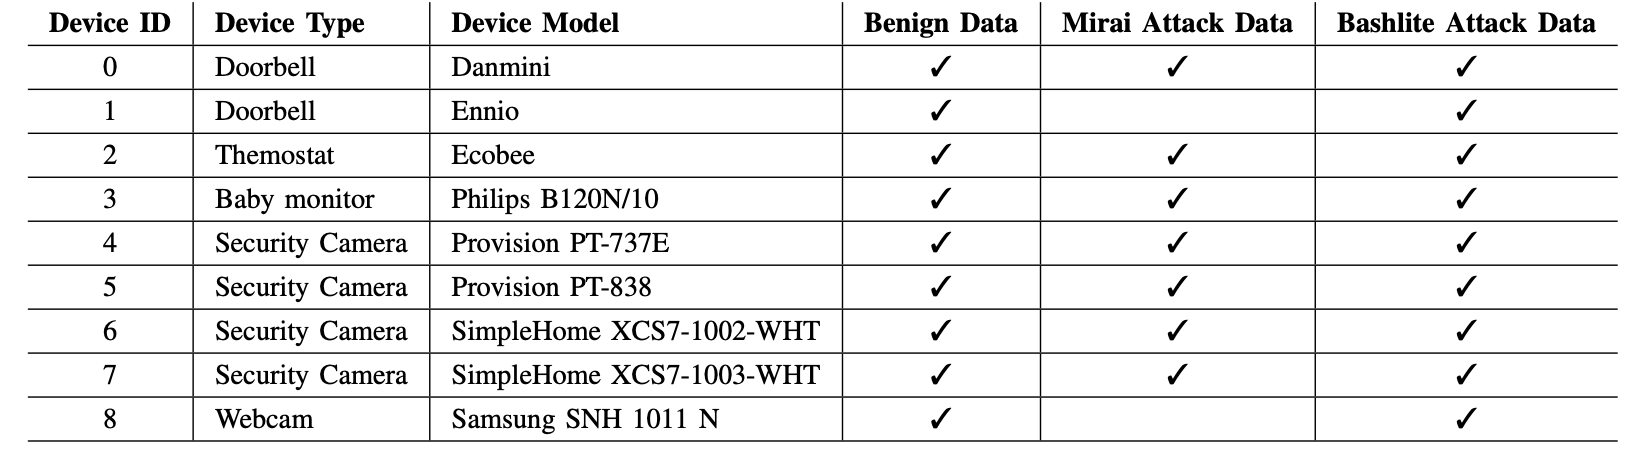

As shown in the table, Mirai attack data is unavailable for two IoT devices: Ennio_Doorbell and Samsung_SNH_1011_N_Webcam.


In this program, one of the IoT devices will be selected for analysis. In the code below, I have chosen the first device, Danmini_Doorbell.

In [ ]:
# Select the IoT device

IoT_device = 'Danmini_Doorbell'
#IoT_device = 'Ecobee_Thermostat'
#IoT_device = 'Ennio_Doorbell'
#IoT_device = 'Philips_B120N10_Baby_Monitor'
#IoT_device = 'Provision_PT_737E_Security_Camera'
#IoT_device = 'Provision_PT_838_Security_Camera'
#IoT_device = 'SimpleHome_XCS7_1002_WHT_Security_Camera'
#IoT_device = 'SimpleHome_XCS7_1003_WHT_Security_Camera'
#IoT_device = 'Samsung_SNH_1011_N_Webcam'

print(IoT_device, 'selected')

Danmini_Doorbell selected


### Load the normal data for the selected IoT device

In [ ]:
# BENIGN
benign_data = pd.read_csv('/content/N_BaIoT_Dataset/'+ IoT_device+ '/benign_traffic.csv', quotechar='"')

print("benign shape:", benign_data.shape)

benign shape: (49548, 115)


### Load MIRAI ATTACKS data for the selected IoT device

In [ ]:
#MIRAI ATTACKS:
if (IoT_device!='Ennio_Doorbell') and (IoT_device!='Samsung_SNH_1011_N_Webcam'):
    #1.ack
    mirai_ack_data = pd.read_csv('/content/N_BaIoT_Dataset/'+ IoT_device+ '/mirai_attacks/ack.csv',quotechar='"')

    #2.scan
    mirai_scan_data = pd.read_csv('/content/N_BaIoT_Dataset/'+ IoT_device+ '/mirai_attacks/scan.csv',quotechar='"')

    #3.syn
    mirai_syn_data = pd.read_csv('/content/N_BaIoT_Dataset/'+ IoT_device+ '/mirai_attacks/syn.csv',quotechar='"')

    #4.udp
    mirai_udp_data = pd.read_csv('/content/N_BaIoT_Dataset/'+ IoT_device+ '/mirai_attacks/udp.csv',quotechar='"')

    #5.udpplain
    mirai_udpplain_data = pd.read_csv('/content/N_BaIoT_Dataset/'+ IoT_device+ '/mirai_attacks/udpplain.csv',quotechar='"')

    print("mirai_ack shape:", mirai_ack_data.shape)
    print("mirai_scan shape:", mirai_scan_data.shape)
    print("mirai_syn shape:", mirai_syn_data.shape)
    print("mirai_udp shape:", mirai_udp_data.shape)
    print("mirai_udpplain shape:", mirai_udpplain_data.shape)

else:
    print ('No MIRAI ATTACKS data for', IoT_device)


mirai_ack shape: (102195, 115)
mirai_scan shape: (107685, 115)
mirai_syn shape: (122573, 115)
mirai_udp shape: (237665, 115)
mirai_udpplain shape: (81982, 115)


### Load BASHLITE ATTACKS data for the selected IoT device



In [ ]:
#BASHLITE ATTACKS:
#1.combo
gafgyt_combo_data = pd.read_csv('/content/N_BaIoT_Dataset/'+ IoT_device+ '/gafgyt_attacks/combo.csv',quotechar='"')

#2.junk
gafgyt_junk_data = pd.read_csv('/content/N_BaIoT_Dataset/'+ IoT_device+ '/gafgyt_attacks/junk.csv',quotechar='"')

#3.scan
gafgyt_scan_data = pd.read_csv('/content/N_BaIoT_Dataset/'+ IoT_device+ '/gafgyt_attacks/scan.csv',quotechar='"')

#4.tcp
gafgyt_tcp_data = pd.read_csv('/content/N_BaIoT_Dataset/'+ IoT_device+ '/gafgyt_attacks/tcp.csv',quotechar='"')

#5.udp
gafgyt_udp_data = pd.read_csv('/content/N_BaIoT_Dataset/'+ IoT_device+ '/gafgyt_attacks/udp.csv',quotechar='"')


print("gafgyt_combo_data shape:", gafgyt_combo_data.shape)
print("gafgyt_junk_data shape:", gafgyt_junk_data.shape)
print("gafgyt_scan_data shape:", gafgyt_scan_data.shape)
print("gafgyt_tcp_data shape:", gafgyt_tcp_data.shape)
print("gafgyt_udp_data shape:", gafgyt_udp_data.shape)

gafgyt_combo_data shape: (59718, 115)
gafgyt_junk_data shape: (29068, 115)
gafgyt_scan_data shape: (29849, 115)
gafgyt_tcp_data shape: (92141, 115)
gafgyt_udp_data shape: (105874, 115)


# 2. Preprocessing

### Check for any  null values

In [ ]:
#check for any  nullvalues

print("benign_data: ",benign_data.isnull().values.any() )

if (IoT_device!='Ennio_Doorbell') and (IoT_device!='Samsung_SNH_1011_N_Webcam'):
    print("mirai_ack_data: ",mirai_ack_data.isnull().values.any() )
    print("mirai_scan_data: ",mirai_scan_data.isnull().values.any() )
    print("mirai_syn_data: ",mirai_syn_data.isnull().values.any() )
    print("mirai_udp_data: ",mirai_udp_data.isnull().values.any() )
    print("mirai_udpplain_data: ",mirai_udpplain_data.isnull().values.any() )


print("gafgyt_combo_data: ",gafgyt_combo_data.isnull().values.any() )
print("gafgyt_junk_data: ",gafgyt_junk_data.isnull().values.any() )
print("gafgyt_scan_data: ",gafgyt_scan_data.isnull().values.any() )
print("gafgyt_tcp_data: ",gafgyt_tcp_data.isnull().values.any() )
print("gafgyt_udp_data: ",gafgyt_udp_data.isnull().values.any() )



benign_data:  False
mirai_ack_data:  False
mirai_scan_data:  False
mirai_syn_data:  False
mirai_udp_data:  False
mirai_udpplain_data:  False
gafgyt_combo_data:  False
gafgyt_junk_data:  False
gafgyt_scan_data:  False
gafgyt_tcp_data:  False
gafgyt_udp_data:  False


### Split normal data.

The normal data will be assigned the label 0.

The normal data will be seperated into two parts: traing data (80%) and testing data (20%).


In [ ]:
#label: 0 = nomal
tmp_df = benign_data.copy()
tmp_df["label"]=0
benign_data_label = tmp_df["label"]

#split  benign_data
x_train, x_test, y_train, y_test = train_test_split(
    benign_data, benign_data_label, test_size=0.2, stratify=benign_data_label)

del tmp_df

The MinMaxScaler is used to scale the data, as shown below:

In [ ]:
a_scaler = MinMaxScaler()

a_scaler.fit(x_train)

x_train_scaled = a_scaler.transform(x_train)
x_test_scaled = a_scaler.transform(x_test)

### Asign labels to MIRAI ATTACKS data.
The attacks data will be assigned the labe 1

In [ ]:
#label: 1 = anomaly
if (IoT_device!='Ennio_Doorbell') and (IoT_device!='Samsung_SNH_1011_N_Webcam'):
    #ack:
    tmp_df = mirai_ack_data.copy()
    tmp_df["label"]=1
    mirai_ack_data_label = tmp_df["label"]

    #scan:
    tmp_df = mirai_scan_data.copy()
    tmp_df["label"]=1
    mirai_scan_data_label = tmp_df["label"]

    #syn:
    tmp_df = mirai_syn_data.copy()
    tmp_df["label"]=1
    mirai_syn_data_label = tmp_df["label"]

    #udp:
    tmp_df = mirai_udp_data.copy()
    tmp_df["label"]=1
    mirai_udp_data_label = tmp_df["label"]

    #udpplain:
    tmp_df = mirai_udpplain_data.copy()
    tmp_df["label"]=1
    mirai_udpplain_data_label = tmp_df["label"]


    del tmp_df

### Asign labels to BASHLITE ATTACKS data

In [ ]:
#label: 1 = anomaly
#combo:
tmp_df = gafgyt_combo_data.copy()
tmp_df["label"]=1
gafgyt_combo_data_label = tmp_df["label"]

#junk:
tmp_df = gafgyt_junk_data.copy()
tmp_df["label"]=1
gafgyt_junk_data_label = tmp_df["label"]

#scan:
tmp_df = gafgyt_scan_data.copy()
tmp_df["label"]=1
gafgyt_scan_data_label = tmp_df["label"]

#tcp:
tmp_df = gafgyt_tcp_data.copy()
tmp_df["label"]=1
gafgyt_tcp_data_label = tmp_df["label"]

#udp:
tmp_df = gafgyt_udp_data.copy()
tmp_df["label"]=1
gafgyt_udp_data_label = tmp_df["label"]


del tmp_df

The MinMaxScaler is also used to scale the attacks data, as shown below:

In [ ]:
if (IoT_device!='Ennio_Doorbell') and (IoT_device!='Samsung_SNH_1011_N_Webcam'):
    #ack:
    mirai_ack_data_scaled = a_scaler.transform(mirai_ack_data)

    #scan:
    mirai_scan_data_scaled = a_scaler.transform(mirai_scan_data)

    #syn:
    mirai_syn_data_scaled = a_scaler.transform(mirai_syn_data)

    #udp:
    mirai_udp_data_scaled = a_scaler.transform(mirai_udp_data)

    #udpplain:
    mirai_udpplain_data_scaled = a_scaler.transform(mirai_udpplain_data)

In [ ]:
#combo:
gafgyt_combo_data_scaled = a_scaler.transform(gafgyt_combo_data)

#junk:
gafgyt_junk_data_scaled = a_scaler.transform(gafgyt_junk_data)

#scan:
gafgyt_scan_data_scaled = a_scaler.transform(gafgyt_scan_data)

#tcp:
gafgyt_tcp_data_scaled = a_scaler.transform(gafgyt_tcp_data)

#udp:
gafgyt_udp_data_scaled = a_scaler.transform(gafgyt_udp_data)

# 3. Create an autoencoder model

### A brief introduction to autoencoders
An autoencoder is an artificial neural network used for anomaly detection by learning efficient representations of normal data. It consists of an encoder that compresses input data into a lower-dimensional form and a decoder that reconstructs the original data from the compressed representation, as shown in the folowing figure.

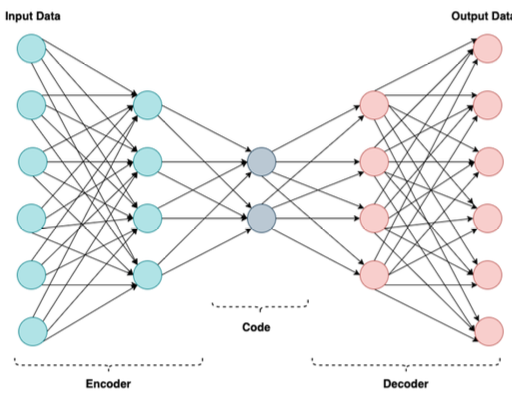

The model is trained on normal network traffic so that it can accurately reconstruct typical patterns. If the reconstruction error exceeds a predefined threshold, the data is classified as anomalous, indicating potential cyber threats or irregular activity. This approach is widely used in anomaly detection systems.

### Create an autoencoder model

In this program, a simple autoencoder is created with three hidden layers, containing 50, 10, and 50 nodes, respectively. In addition, the tanh activation function is used in each hidden node.

In [ ]:
input_dim = 115
activation = 'tanh'

model = Sequential()
model.add(Dense(50, activation=activation, input_shape=(input_dim,)))
model.add(Dense(10, activation=activation))
model.add(Dense(50, activation=activation))
model.add(Dense(input_dim))

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 50)                  │           5,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             510 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 50)                  │             550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 115)                 │           5,865 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,725 (49.71 KB)

 Trainable params: 12,725 (49.71 KB)

 Non-trainable params: 0 (0.00 B)

### Complile the model

The model is configured for training using the Mean Squared Logarithmic Error (MSLE) loss function, the Adam optimizer, and MSLE as a metric to monitor training performance.


In [ ]:
loss_function = tf.keras.losses.MSLE
model.compile(optimizer='adam',
              loss=loss_function,
              metrics=['msle'])

# 4. Train the model

### The model will be trained on normal data for 20 epochs with a batch size of 512.

In [ ]:
train_history = model.fit(
    x_train_scaled,
    x_train_scaled,
    epochs=20,
    batch_size=512,
    validation_data=(x_test_scaled, x_test_scaled)
)


Epoch 1/20
78/78 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0129 - msle: 0.0129 - val_loss: 0.0025 - val_msle: 0.0025
Epoch 2/20
78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0022 - msle: 0.0022 - val_loss: 0.0018 - val_msle: 0.0018
Epoch 3/20
78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0017 - msle: 0.0017 - val_loss: 0.0014 - val_msle: 0.0014
Epoch 4/20
78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0013 - msle: 0.0013 - val_loss: 0.0011 - val_msle: 0.0011
Epoch 5/20
78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0011 - msle: 0.0011 - val_loss: 0.0010 - val_msle: 0.0010
Epoch 6/20
78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 9.8458e-04 - msle: 9.8458e-04 - val_loss: 5.7611e-04 - val_msle: 5.7611e-04
Epoch 7/20
78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 5.6410e-04 - msle: 5.6410e-04 - val_loss: 5.3453e-04 - val_msle: 5.3453e-04
Epoch 8/20
78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 5.2442e-04 - msle: 5.2442e-04 - val_loss: 5.0993e-04 - val_msle: 5.0993e-04
Epoch

### Visualizes the training and validation loss throughout the training process

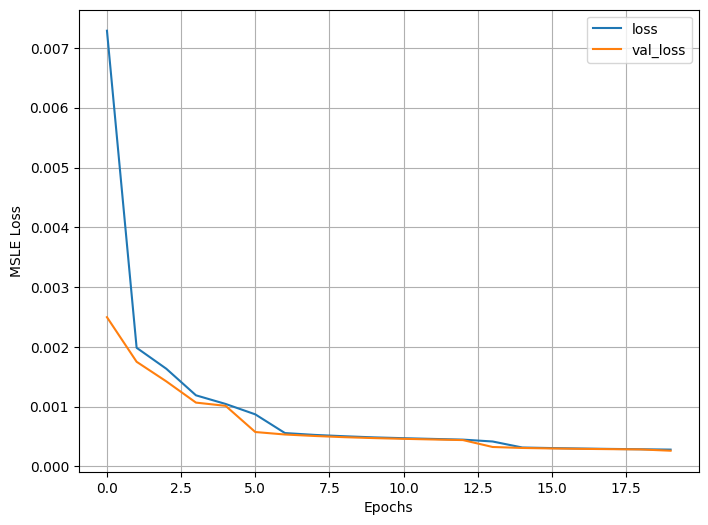

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(train_history.history['loss'])
plt.plot(train_history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('MSLE Loss')
plt.legend(['loss', 'val_loss'])
plt.grid()
plt.show()

# 5. Find thresholds
A threshold will be used to distinguish between normal and abnormal data. If the trained autoencoder model reconstructs the data with an accuracy above this threshold, it is classified as normal; otherwise, it is considered abnormal. This is because the autoencoder is designed to reconstruct normal data effectively. When the reconstruction accuracy is low, it indicates that the input deviates from the learned normal patterns, signaling an anomaly.

The following visualization illustrates the reconstruction accuracy of normal data using MSLE (Mean Squared Logarithmic Error).



Here, the threshold is determined based on the assumption that 1% of the normal data may be classified as abnormal.  

In [ ]:
x_train_reconstruction = model.predict(x_train_scaled)
# provides losses of individual instances
x_train_reconstruction_errors = tf.keras.losses.msle(x_train_reconstruction, x_train_scaled)

#percentile
threshold = np.percentile(x_train_reconstruction_errors, 99)
#print('99 percentiles of the training data: ',threshold)
print('The threshold: ',threshold)

1239/1239 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
The threshold:  0.0030267806377386615


Below is the visualization of errors of reconstructing training data and the selected threshold which is in red color.

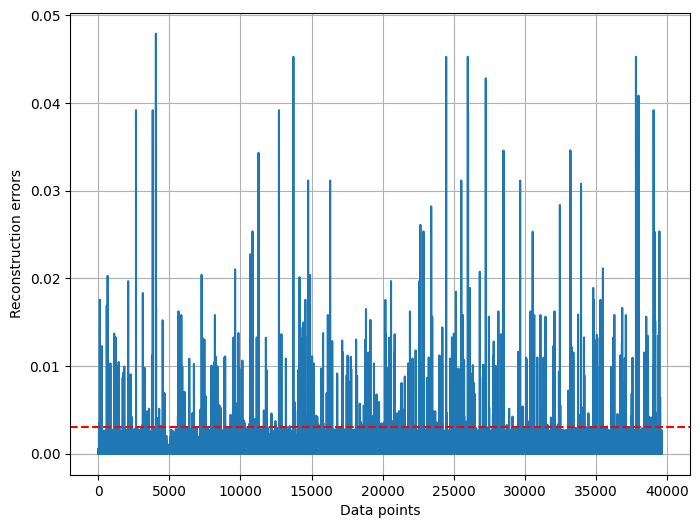

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(x_train_reconstruction_errors)
plt.axhline(y=threshold, color='r', linestyle='--', label="The selected threshold")  # Horizontal reference line
plt.xlabel('Data points')
plt.ylabel('Reconstruction errors')
plt.grid()
plt.show()


# 6. Detect Anomalies

The following fuction will help to convert the error of re-contructing a data point to value of label 0 or 1

In [ ]:
def get_prediction_label(prediction_error, selected_threshold):
    prediction_mask = pd.Series(prediction_error) > selected_threshold
    # 0 = anomal, 1 = normaly
    prediction_label = prediction_mask.map(lambda x: 1.0 if x == True else 0.0)
    return prediction_label


### MIRAI ATTACKS

### mirai_ack_data

The following test assesses the model's ability to detect MIRAI_ack attacks. As shown in the visualization, all reconstruction errors for these attacks exceed the selected threshold, indicating 100% detection accuracy for this attack type.

3194/3194 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
mirai_ack_data_accuracy_score_prediction:  1.0


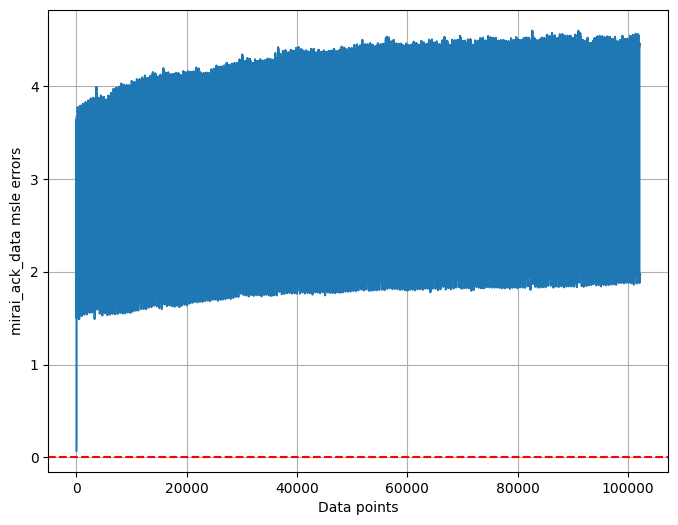

In [ ]:
if (IoT_device!='Ennio_Doorbell') and (IoT_device!='Samsung_SNH_1011_N_Webcam'):

    mirai_ack_data_prediction= model.predict(mirai_ack_data_scaled)

    mirai_ack_data_prediction_error= tf.keras.losses.msle(mirai_ack_data_prediction, mirai_ack_data_scaled)

    mirai_ack_data_prediction_label=get_prediction_label(mirai_ack_data_prediction_error, threshold)

    mirai_ack_data_accuracy_score=accuracy_score(mirai_ack_data_prediction_label, mirai_ack_data_label)

    print ('mirai_ack_data_accuracy_score_prediction: ', mirai_ack_data_accuracy_score)

    plt.figure(figsize=(8, 6))
    plt.plot(mirai_ack_data_prediction_error)
    plt.axhline(y=threshold, color='r', linestyle='--', label="The selected threshold")  # Horizontal reference line
    plt.xlabel('Data points')
    plt.ylabel('mirai_ack_data msle errors')
    plt.grid()
    plt.show()

else:
    print ('No MIRAI ATTACKS data for', IoT_device)


### mirai_scan_data

The following test evaluates the model's ability to detect MIRAI_scan attacks. As shown in the visualization, most reconstruction errors exceed the selected threshold, except for a few data points at the start of the attack. The detection accuracy remains very high (nearly 100%).


3366/3366 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
mirai_scan_data_accuracy_score_prediction:  1.0


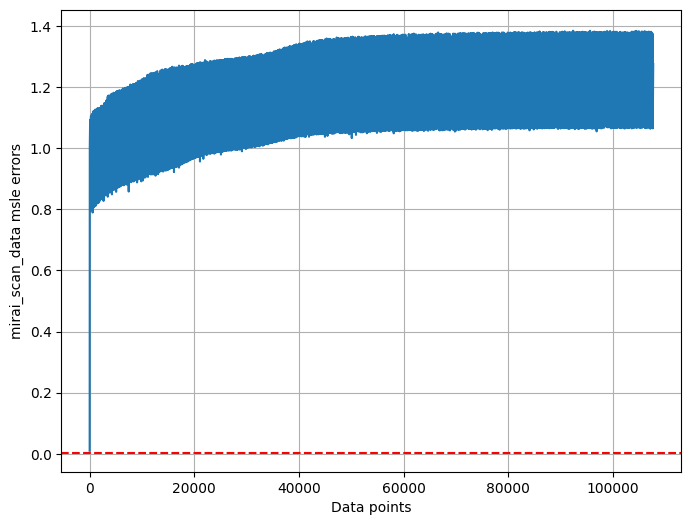

In [ ]:
if (IoT_device!='Ennio_Doorbell') and (IoT_device!='Samsung_SNH_1011_N_Webcam'):

    mirai_scan_data_prediction= model.predict(mirai_scan_data_scaled)

    mirai_scan_data_prediction_error= tf.keras.losses.msle(mirai_scan_data_prediction, mirai_scan_data_scaled)

    mirai_scan_data_prediction_label=get_prediction_label(mirai_scan_data_prediction_error, threshold)

    mirai_scan_data_accuracy_score=accuracy_score(mirai_scan_data_prediction_label, mirai_scan_data_label)

    print ('mirai_scan_data_accuracy_score_prediction: ', mirai_scan_data_accuracy_score)

    plt.figure(figsize=(8, 6))
    plt.plot(mirai_scan_data_prediction_error)
    plt.axhline(y=threshold, color='r', linestyle='--', label="The selected threshold")  # Horizontal reference line
    plt.xlabel('Data points')
    plt.ylabel('mirai_scan_data msle errors')
    plt.grid()
    plt.show()

else:
    print ('No MIRAI ATTACKS data for', IoT_device)

### mirai_syn_data

The following test evaluates the model's ability to detect MIRAI_syn attacks. As shown in the visualization, most reconstruction errors exceed the selected threshold, except for a few data points at the start of the attack. The detection accuracy remains very high (nearly 100%).

3831/3831 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
mirai_syn_data_accuracy_score_prediction:  1.0


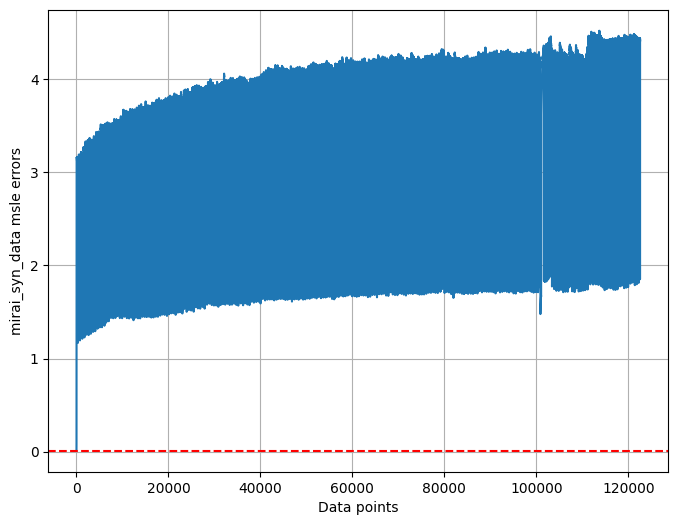

In [ ]:
if (IoT_device!='Ennio_Doorbell') and (IoT_device!='Samsung_SNH_1011_N_Webcam'):
    mirai_syn_data_prediction= model.predict(mirai_syn_data_scaled)

    mirai_syn_data_prediction_error= tf.keras.losses.msle(mirai_syn_data_prediction, mirai_syn_data_scaled)

    mirai_syn_data_prediction_label=get_prediction_label(mirai_syn_data_prediction_error, threshold)

    mirai_syn_data_accuracy_score=accuracy_score(mirai_syn_data_prediction_label, mirai_syn_data_label)

    print ('mirai_syn_data_accuracy_score_prediction: ', mirai_syn_data_accuracy_score)

    plt.figure(figsize=(8, 6))
    plt.plot(mirai_syn_data_prediction_error)
    plt.axhline(y=threshold, color='r', linestyle='--', label="The selected threshold")  # Horizontal reference line
    plt.xlabel('Data points')
    plt.ylabel('mirai_syn_data msle errors')
    plt.grid()
    plt.show()

else:
    print ('No MIRAI ATTACKS data for', IoT_device)

### mirai_udp_data

The following test evaluates the model's ability to detect MIRAI_udp attacks. As shown in the visualization, most reconstruction errors exceed the selected threshold, except for a few data points at the start of the attack. The detection accuracy remains very high (nearly 100%).

7428/7428 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step
mirai_udp_data_accuracy_score_prediction:  1.0


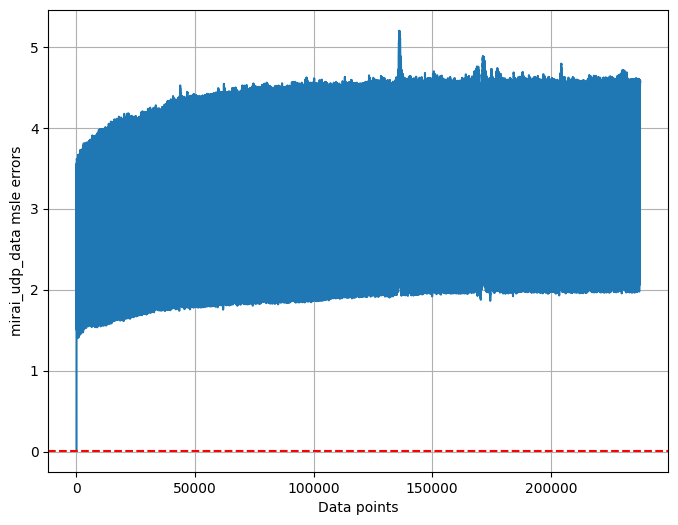

In [ ]:
if (IoT_device!='Ennio_Doorbell') and (IoT_device!='Samsung_SNH_1011_N_Webcam'):

    mirai_udp_data_prediction= model.predict(mirai_udp_data_scaled)

    mirai_udp_data_prediction_error= tf.keras.losses.msle(mirai_udp_data_prediction, mirai_udp_data_scaled)

    mirai_udp_data_prediction_label=get_prediction_label(mirai_udp_data_prediction_error, threshold)

    mirai_udp_data_accuracy_score=accuracy_score(mirai_udp_data_prediction_label, mirai_udp_data_label)

    print ('mirai_udp_data_accuracy_score_prediction: ', mirai_udp_data_accuracy_score)

    plt.figure(figsize=(8, 6))
    plt.plot(mirai_udp_data_prediction_error)
    plt.axhline(y=threshold, color='r', linestyle='--', label="The selected threshold")  # Horizontal reference line
    plt.xlabel('Data points')
    plt.ylabel('mirai_udp_data msle errors')
    plt.grid()
    plt.show()

else:
    print ('No MIRAI ATTACKS data for', IoT_device)

### mirai_udpplain_data

The following test assesses the model's ability to detect MIRAI_udpplain attacks. As shown in the visualization, all reconstruction errors for these attacks exceed the selected threshold, indicating 100% detection accuracy for this attack type.

2562/2562 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step
mirai_udpplain_data_accuracy_score_prediction:  1.0


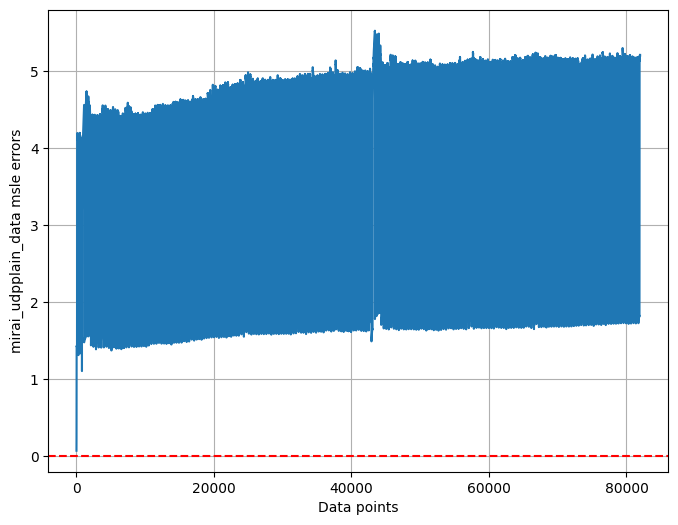

In [ ]:
if (IoT_device!='Ennio_Doorbell') and (IoT_device!='Samsung_SNH_1011_N_Webcam'):

    mirai_udpplain_data_prediction= model.predict(mirai_udpplain_data_scaled)

    mirai_udpplain_data_prediction_error= tf.keras.losses.msle(mirai_udpplain_data_prediction, mirai_udpplain_data_scaled)

    mirai_udpplain_data_prediction_label=get_prediction_label(mirai_udpplain_data_prediction_error, threshold)

    mirai_udpplain_data_accuracy_score=accuracy_score(mirai_udpplain_data_prediction_label, mirai_udpplain_data_label)

    print ('mirai_udpplain_data_accuracy_score_prediction: ', mirai_udpplain_data_accuracy_score)

    plt.figure(figsize=(8, 6))
    plt.plot(mirai_udpplain_data_prediction_error)
    plt.axhline(y=threshold, color='r', linestyle='--', label="The selected threshold")  # Horizontal reference line
    plt.xlabel('Data points')
    plt.ylabel('mirai_udpplain_data msle errors')
    plt.grid()
    plt.show()

else:
    print ('No MIRAI ATTACKS data for', IoT_device)

### BASHLITE ATTACKS

### gafgyt_combo_data

The following test evaluates the model's ability to detect afgyt_combo attacks. As shown in the visualization, most reconstruction errors exceed the selected threshold, except for a few data points at the start of the attack. The detection accuracy remains very high (nearly 100%).

1867/1867 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
gafgyt_combo_data_accuracy_score_prediction:  1.0


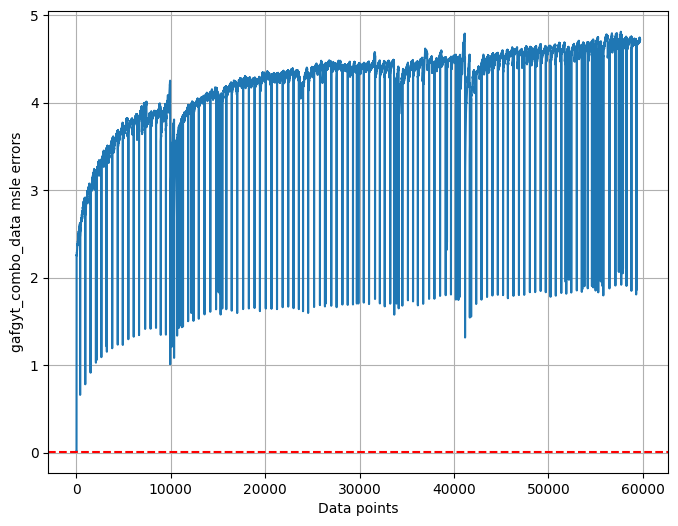

In [ ]:
gafgyt_combo_data_prediction= model.predict(gafgyt_combo_data_scaled)

gafgyt_combo_data_prediction_error= tf.keras.losses.msle(gafgyt_combo_data_prediction, gafgyt_combo_data_scaled)

gafgyt_combo_data_prediction_label=get_prediction_label(gafgyt_combo_data_prediction_error, threshold)

gafgyt_combo_data_accuracy_score=accuracy_score(gafgyt_combo_data_prediction_label, gafgyt_combo_data_label)

print ('gafgyt_combo_data_accuracy_score_prediction: ', gafgyt_combo_data_accuracy_score)

plt.figure(figsize=(8, 6))
plt.plot(gafgyt_combo_data_prediction_error)
plt.axhline(y=threshold, color='r', linestyle='--', label="The selected threshold")  # Horizontal reference line
plt.xlabel('Data points')
plt.ylabel('gafgyt_combo_data msle errors')
plt.grid()
plt.show()

### gafgyt_junk_data

 The following test evaluates the model's ability to detect afgyt_junk attacks. As shown in the visualization, most reconstruction errors exceed the selected threshold, except for a few data points at the start of the attack. The detection accuracy remains very high (nearly 100%).

909/909 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
gafgyt_junk_data_accuracy_score_prediction:  1.0


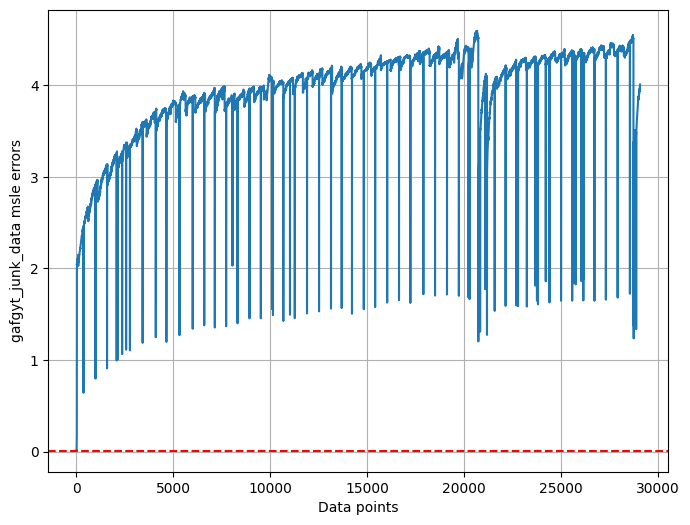

In [ ]:
gafgyt_junk_data_prediction= model.predict(gafgyt_junk_data_scaled)

gafgyt_junk_data_prediction_error= tf.keras.losses.msle(gafgyt_junk_data_prediction, gafgyt_junk_data_scaled)

gafgyt_junk_data_prediction_label=get_prediction_label(gafgyt_junk_data_prediction_error, threshold)

gafgyt_junk_data_accuracy_score=accuracy_score(gafgyt_junk_data_prediction_label, gafgyt_junk_data_label)

print ('gafgyt_junk_data_accuracy_score_prediction: ', gafgyt_junk_data_accuracy_score)

plt.figure(figsize=(8, 6))
plt.plot(gafgyt_junk_data_prediction_error)
plt.axhline(y=threshold, color='r', linestyle='--', label="The selected threshold")  # Horizontal reference line
plt.xlabel('Data points')
plt.ylabel('gafgyt_junk_data msle errors')
plt.grid()
plt.show()

### gafgyt_scan_data

The following test evaluates the model's ability to detect afgyt_scan attacks. As shown in the visualization, most reconstruction errors exceed the selected threshold, except for a few data points at the start of the attack. The detection accuracy remains very high (nearly 100%).

933/933 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
gafgyt_scan_data_accuracy_score_prediction:  1.0


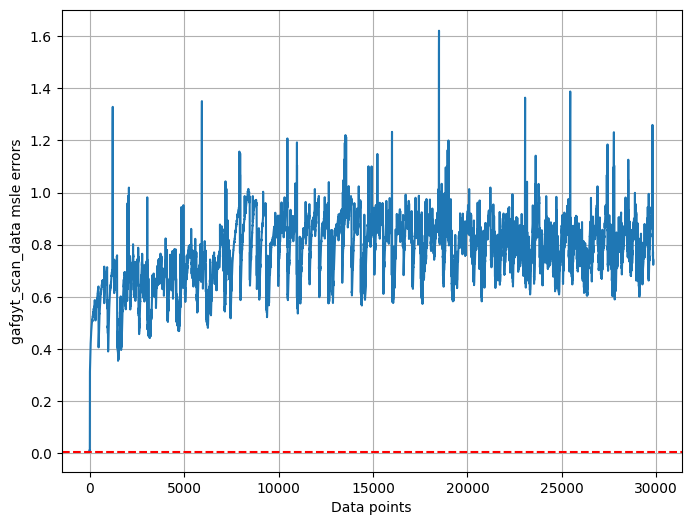

In [ ]:
gafgyt_scan_data_prediction= model.predict(gafgyt_scan_data_scaled)

gafgyt_scan_data_prediction_error= tf.keras.losses.msle(gafgyt_scan_data_prediction, gafgyt_scan_data_scaled)

gafgyt_scan_data_prediction_label=get_prediction_label(gafgyt_scan_data_prediction_error, threshold)

gafgyt_scan_data_accuracy_score=accuracy_score(gafgyt_scan_data_prediction_label, gafgyt_scan_data_label)

print ('gafgyt_scan_data_accuracy_score_prediction: ', gafgyt_scan_data_accuracy_score)

plt.figure(figsize=(8, 6))
plt.plot(gafgyt_scan_data_prediction_error)
plt.axhline(y=threshold, color='r', linestyle='--', label="The selected threshold")  # Horizontal reference line
plt.xlabel('Data points')
plt.ylabel('gafgyt_scan_data msle errors')
plt.grid()
plt.show()

### gafgyt_tcp_data

The following test assesses the model's ability to detect gafgyt_tcp attacks. As shown in the visualization, all reconstruction errors for these attacks exceed the selected threshold, indicating 100% detection accuracy for this attack type.

However, the reconstruction errors for this type of attack are close to the threshold, suggesting that the program may not be highly effective in detecting such attacks.

2880/2880 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
gafgyt_tcp_data_accuracy_score_prediction:  1.0


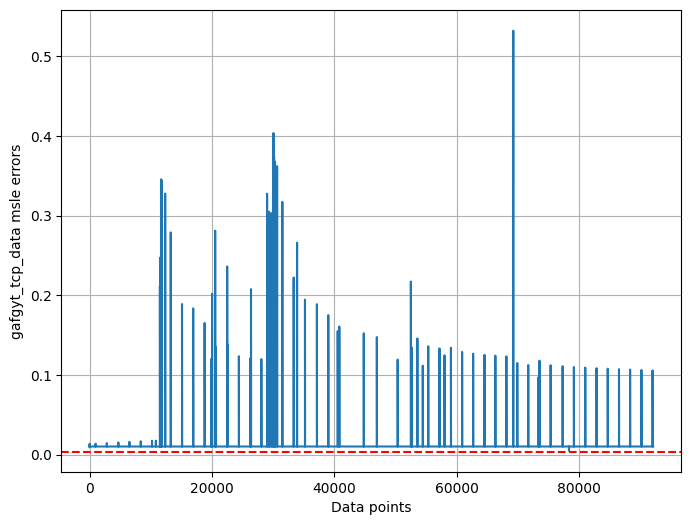

In [ ]:
gafgyt_tcp_data_prediction= model.predict(gafgyt_tcp_data_scaled)

gafgyt_tcp_data_prediction_error= tf.keras.losses.msle(gafgyt_tcp_data_prediction, gafgyt_tcp_data_scaled)

gafgyt_tcp_data_prediction_label=get_prediction_label(gafgyt_tcp_data_prediction_error, threshold)

gafgyt_tcp_data_accuracy_score=accuracy_score(gafgyt_tcp_data_prediction_label, gafgyt_tcp_data_label)

print ('gafgyt_tcp_data_accuracy_score_prediction: ', gafgyt_tcp_data_accuracy_score)

plt.figure(figsize=(8, 6))
plt.plot(gafgyt_tcp_data_prediction_error)
plt.axhline(y=threshold, color='r', linestyle='--', label="The selected threshold")  # Horizontal reference line
plt.xlabel('Data points')
plt.ylabel('gafgyt_tcp_data msle errors')
plt.grid()
plt.show()

### gafgyt_udp_data

The following test assesses the model's ability to detect Gafgyt_UDP attacks. As shown in the visualization, most reconstruction errors exceed the selected threshold, indicating a high detection accuracy (nearly 100%).

However, the reconstruction errors for this type of attack are close to the threshold, suggesting that the program may not be highly effective in detecting such attacks.

3309/3309 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
gafgyt_udp_data_accuracy_score_prediction:  0.9999527740521752


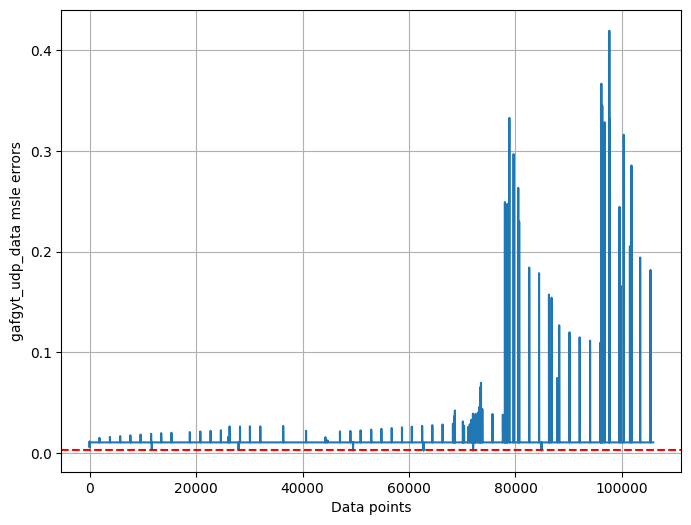

In [ ]:
gafgyt_udp_data_prediction= model.predict(gafgyt_udp_data_scaled)

gafgyt_udp_data_prediction_error= tf.keras.losses.msle(gafgyt_udp_data_prediction, gafgyt_udp_data_scaled)

gafgyt_udp_data_prediction_label=get_prediction_label(gafgyt_udp_data_prediction_error, threshold)

gafgyt_udp_data_accuracy_score=accuracy_score(gafgyt_udp_data_prediction_label, gafgyt_udp_data_label)

print ('gafgyt_udp_data_accuracy_score_prediction: ', gafgyt_udp_data_accuracy_score)

plt.figure(figsize=(8, 6))
plt.plot(gafgyt_udp_data_prediction_error)
plt.axhline(y=threshold, color='r', linestyle='--', label="The selected threshold")  # Horizontal reference line
plt.xlabel('Data points')
plt.ylabel('gafgyt_udp_data msle errors')
plt.grid()
plt.show()

# 7. Save the model

In [ ]:
import tempfile
import os

# get the tempfile location for this Colab session
MODEL_DIR = './Save Model'
version = "v1"   # NOTE: Adjust if you don't want to replace a version of your model
export_path = os.path.join(MODEL_DIR, str(version))
print(export_path)

./Save Model/v1


That's a wrap!

Thank you very much for your time and your consideration.
